In [2]:
import sounddevice as sd
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

In [3]:
duration = 10
fs = 48000
Nsamples = int(duration * fs)

In [17]:
#myrecording = sd.rec(Nsamples, samplerate=fs, channels=1, blocking=True)[:,0]

In [33]:
#pureC = sd.rec(Nsamples, samplerate=fs, channels=1, blocking=True)[:,0] #dur5

In [42]:
Cmaj = sd.rec(Nsamples, samplerate=fs, channels=1, blocking=True)[:,0]#dur5

In [47]:
# Cscale = sd.rec(Nsamples, samplerate=fs, channels=1)[:,0]#dur5

[ 0.9999695   0.9999695   0.9999695  ... -0.00592041 -0.00515747
 -0.00527954]


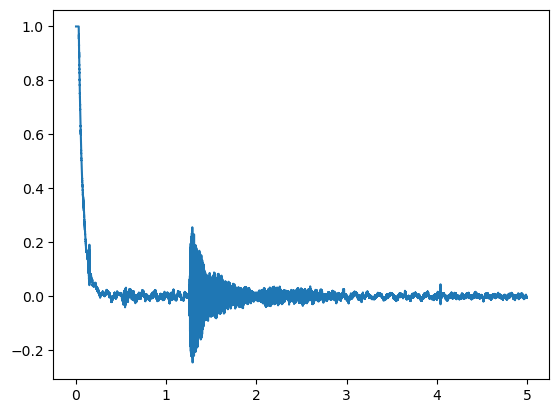

In [60]:
r=Cmaj

print(r)
t = np.arange(Nsamples)/fs
fig,ax = plt.subplots()
ax.plot(t, r)

[120 119 140]


array([662.14507415, 656.62719853, 772.5025865 ])

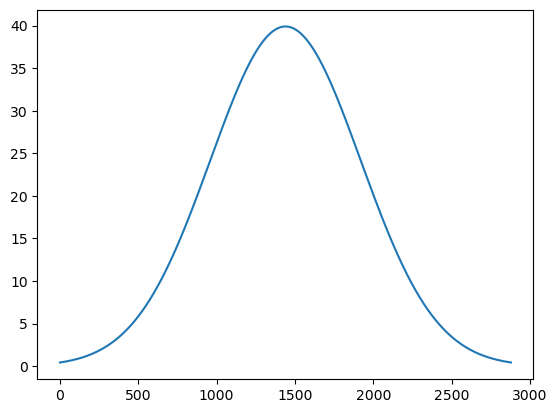

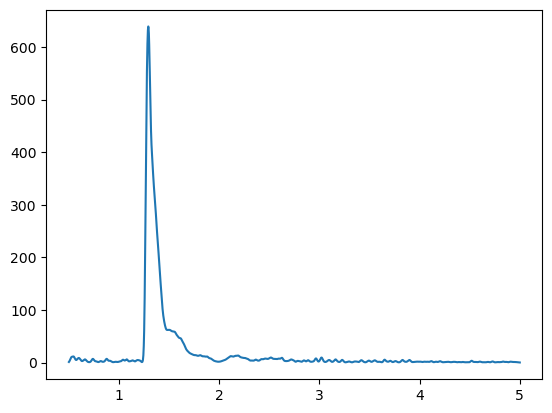

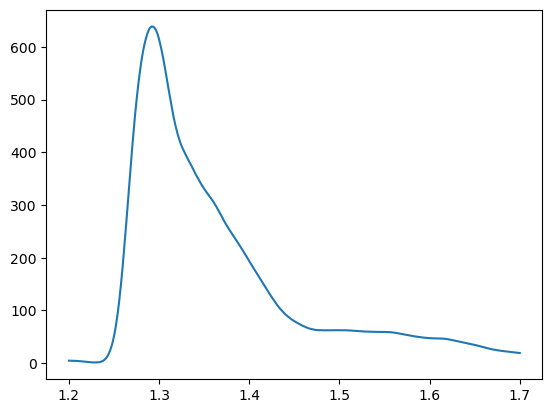

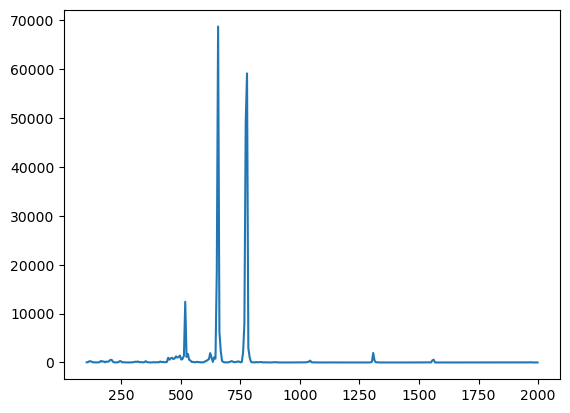

In [79]:
#extracting chord and duration
#ignore first 0.5 seconds
# blur(abs(signal)) to find peaks
# FT first peak to get chord
# output as string
# time between this and last peak, output this too

signal = Cmaj

cutsignal = signal[t>0.5]
cutt = t[t>0.5]
s = 0.01
blurProfile = (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(np.linspace(-3*s, 3*s, int(6*s*fs))/s)**2)

signalBlurred = np.convolve(cutsignal**2, blurProfile, mode='same')

fig,ax = plt.subplots()
ax.plot(blurProfile)

fig,ax = plt.subplots()
ax.plot(cutt, signalBlurred)

mask = (cutt>1.2)&(cutt<1.7)
fig,ax = plt.subplots()
ax.plot(cutt[mask], signalBlurred[mask])


chordrange = signalBlurred>100

FT = fft.fft(cutsignal[chordrange])
freqs = fft.fftfreq(len(cutsignal[chordrange]), d=1/fs)

FT = FT[freqs>=0]
freqs = freqs[freqs>=0]

fmask = (freqs>100)&(freqs<2000)

fig,ax = plt.subplots()
ax.plot(freqs[fmask], np.abs(FT[fmask])**2)

noteBins = 220*(2**((np.arange(12*3)-0.5)/12)) # starting from A below middle

peaks = np.argsort(FT)[-3:]
print(peaks)
freqs[peaks]

In [ ]:
{}

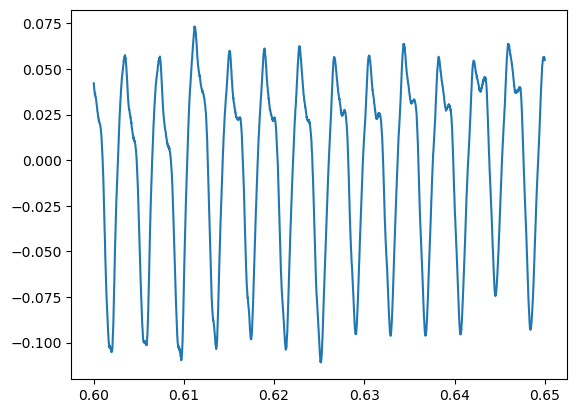

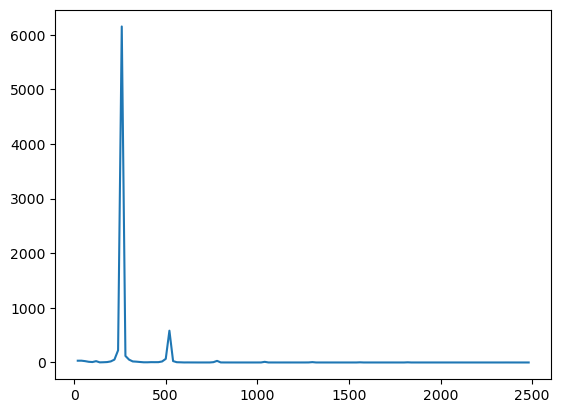

In [55]:
sectionMask = (t>0.6)&(t<0.65)

fig,ax = plt.subplots()
ax.plot(t[sectionMask], r[sectionMask])
section = r[sectionMask]

FT = fft.fft(section)
freqs = fft.fftfreq(len(section), d=1/fs)

mask = (freqs>10)&(freqs<2500)

fig,ax = plt.subplots()
ax.plot(freqs[mask], np.abs(FT[mask])**2)